In [1]:
import os
from getpass import getpass

In [2]:
os.environ['OPENAI_API_KEY'] = getpass("Enter OPENAI API Key: ")

In [3]:
openai_model = "gpt-4o-mini"

In [4]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(temperature=0.0, model=openai_model)
creative_llm = ChatOpenAI(temperature=0.9, model=openai_model)

In [5]:
article = """
We believe AI's short—to mid-term future belongs to agents and that the long-term future of *AGI* may evolve from agentic systems. Our definition of agents covers any neuro-symbolic system in which we merge neural AI (such as an LLM) with semi-traditional software.

With agents, we allow LLMs to integrate with code — allowing AI to search the web, perform math, and essentially integrate into anything we can build with code. It should be clear the scope of use cases is phenomenal where AI can integrate with the broader world of software.

In this introduction to AI agents, we will cover the essential concepts that make them what they are and why that will make them the core of real-world AI in the years to come.

---

## Neuro-Symbolic Systems

Neuro-symbolic systems consist of both neural and symbolic computation, where:

- Neural refers to LLMs, embedding models, or other neural network-based models.
- Symbolic refers to logic containing symbolic logic, such as code.

Both neural and symbolic AI originate from the early philosophical approaches to AI: connectionism (now neural) and symbolism. Symbolic AI is the more traditional AI. Diehard symbolists believed they could achieve true AGI via written rules, ontologies, and other logical functions.

The other camp were the connectionists. Connectionism emerged in 1943 with a theoretical neural circuit but truly kicked off with Rosenblatt's perceptron paper in 1958 [1][2]. Both of these approaches to AI are fascinating but deserve more time than we can give them here, so we will leave further exploration of these concepts for a future chapter.

Most important to us is understanding where symbolic logic outperforms neural-based compute and vice-versa.

| Neural | Symbolic |
| --- | --- |
| Flexible, learned logic that can cover a huge range of potential scenarios. | Mostly hand-written rules which can be very granular and fine-tuned but hard to scale. |
| Hard to interpret why a neural system does what it does. Very difficult or even impossible to predict behavior. | Rules are written and can be understood. When unsure why a particular ouput was produced we can look at the rules / logic to understand. |
| Requires huge amount of data and compute to train state-of-the-art neural models, making it hard to add new abilities or update with new information. | Code is relatively cheap to write, it can be updated with new features easily, and latest information can often be added often instantaneously. |
| When trained on broad datasets can often lack performance when exposed to unique scenarios that are not well represented in the training data. | Easily customized to unique scenarios. |
| Struggles with complex computations such as mathematical operations. | Perform complex computations very quickly and accurately. |

Pure neural architectures struggle with many seemingly simple tasks. For example, an LLM *cannot* provide an accurate answer if we ask it for today's date.

Retrieval Augmented Generation (RAG) is commonly used to provide LLMs with up-to-date knowledge on a particular subject or access to proprietary knowledge.

### Giving LLMs Superpowers

By 2020, it was becoming clear that neural AI systems could not perform tasks symbolic systems typically excelled in, such as arithmetic, accessing structured DB data, or making API calls. These tasks require discrete input parameters that allow us to process them reliably according to strict written logic.

In 2022, researchers at AI21 developed Jurassic-X, an LLM-based "neuro-symbolic architecture." Neuro-symbolic refers to merging the "neural computation" of large language models (LLMs) with more traditional (i.e. symbolic) computation of code.

Jurassic-X used the Modular Reasoning, Knowledge, and Language (MRKL) system [3]. The researchers developed MRKL to solve the limitations of LLMs, namely:

- Lack of up-to-date knowledge, whether that is the latest in AI or something as simple as today's date.
- Lack of proprietary knowledge, such as internal company docs or your calendar bookings.
- Lack of reasoning, i.e. the inability to perform operations that traditional software is good at, like running complex mathematical operations.
- Lack of ability to generalize. Back in 2022, most LLMs had to be fine-tuned to perform well in a specific domain. This problem is still present today but far less prominent as the SotA models generalize much better and, in the case of MRKL, are able to use tools relatively well (although we could certainly take the MRKL solution to improve tool use performance even today).

MRKL represents one of the earliest forms of what we would now call an agent; it is an LLM (neural computation) paired with executable code (symbolic computation).

## ReAct and Tools

There is a misconception in the broader industry that an AI agent is an LLM contained within some looping logic that can generate inputs for and execute code functions. This definition of agents originates from the huge popularity of the ReAct agent framework and the adoption of a similar structure with function/tool calling by LLM providers such as OpenAI, Anthropic, and Ollama.

![ReAct agent flow with the Reasoning-Action loop [4]. When the action chosen specifies to use a normal tool, the tool is used and the observation returned for another iteration through the Reasoning-Action loop. To return a final answer to the user the LLM must choose action "answer" and provide the natural language response, finishing the loop.](/images/posts/ai-agents/ai-agents-00.png)

<small>ReAct agent flow with the Reasoning-Action loop [4]. When the action chosen specifies to use a normal tool, the tool is used and the observation returned for another iteration through the Reasoning-Action loop. To return a final answer to the user the LLM must choose action "answer" and provide the natural language response, finishing the loop.</small>

Our "neuro-symbolic" definition is much broader but certainly does include ReAct agents and LLMs paired with tools. This agent type is the most common for now, so it's worth understanding the basic concept behind it.

The **Re**ason **Act**ion (ReAct) method encourages LLMs to generate iterative *reasoning* and *action* steps. During *reasoning,* the LLM describes what steps are to be taken to answer the user's query. Then, the LLM generates an *action,* which we parse into an input to some executable code, which we typically describe as a tool/function call.

![ReAct method. Each iteration includes a Reasoning step followed by an Action (tool call) step. The Observation is the output from the previous tool call. During the final iteration the agent calls the answer tool, meaning we generate the final answer for the user.](/images/posts/ai-agents/ai-agents-01.png)

<small>ReAct method. Each iteration includes a Reasoning step followed by an Action (tool call) step. The Observation is the output from the previous tool call. During the final iteration the agent calls the answer tool, meaning we generate the final answer for the user.</small>

Following the reason and action steps, our action tool call returns an observation. The logic returns the observation to the LLM, which is then used to generate subsequent reasoning and action steps.

The ReAct loop continues until the LLM has enough information to answer the original input. Once the LLM reaches this state, it calls a special *answer* action with the generated answer for the user.

## Not only LLMs and Tool Calls

LLMs paired with tool calling are powerful but far from the only approach to building agents. Using the definition of neuro-symbolic, we cover architectures such as:

- Multi-agent workflows that involve multiple LLM-tool (or other agent structure) combinations.
- More deterministic workflows where we may have set neural model-tool paths that may fork or merge as the use case requires.
- Embedding models that can detect user intents and decide tool-use or LLM selection-based selection in vector space.

These are just a few high-level examples of alternative agent structures. Far from being designed for niche use cases, we find these alternative options to frequently perform better than the more common ReAct or Tool agents. We will cover all of these examples and more in future chapters.

---

Agents are fundamental to the future of AI, but that doesn't mean we should expect that future to come from agents in their most popular form today. ReAct and Tool agents are great and handle many simple use cases well, but the scope of agents is much broader, and we believe thinking beyond ReAct and Tools is key to building future AI.

---

You can sign up for the [Aurelio AI newsletter](https://b0fcw9ec53w.typeform.com/to/w2BDHVK7) to stay updated on future releases in our comprehensive course on agents.

---

## References

[1] The curious case of Connectionism (2019) [https://www.degruyter.com/document/doi/10.1515/opphil-2019-0018/html](https://www.degruyter.com/document/doi/10.1515/opphil-2019-0018/html)

[2] F. Rosenblatt, [The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain](https://www.ling.upenn.edu/courses/cogs501/Rosenblatt1958.pdf) (1958), Psychological Review

[3] E. Karpas et al. [MRKL Systems: A Modular, Neuro-Symbolic Architecture That Combines Large Language Models, External Knowledge Sources and Discrete Reasoning](https://arxiv.org/abs/2205.00445) (2022), AI21 Labs
"""

In [14]:
from langchain_core.prompts.chat import SystemMessagePromptTemplate, HumanMessagePromptTemplate, ChatPromptTemplate

In [8]:
system_prompt = SystemMessagePromptTemplate.from_template("You are an AI assistant that helps generate article titles.")

In [10]:
user_prompt = HumanMessagePromptTemplate.from_template("""
You are tasked with creating a name for an article. The article is here for you to examine <{article}>
The name should be based of the context of the article. Be creative, but make sure the names are clear, catchy, and relevant to the theme of the article.
Only ouput the article name, no other explanation or text can be provided.
""", input_variables=["article"])

In [12]:
user_prompt.format(article="TEST STRING")

HumanMessage(content='\nYou are tasked with creating a name for an article. The article is here for you to examine <TEST STRING>\nThe name should be based of the context of the article. Be creative, but make sure the names are clear, catchy, and relevant to the theme of the article.\nOnly ouput the article name, no other explanation or text can be provided.\n', additional_kwargs={}, response_metadata={})

In [13]:
print(user_prompt.format(article="TEST STRING").content)


You are tasked with creating a name for an article. The article is here for you to examine <TEST STRING>
The name should be based of the context of the article. Be creative, but make sure the names are clear, catchy, and relevant to the theme of the article.
Only ouput the article name, no other explanation or text can be provided.



In [15]:
first_prompt = ChatPromptTemplate.from_messages([system_prompt, user_prompt])

In [16]:
print(first_prompt.format(article="TEST STRING"))

System: You are an AI assistant that helps generate article titles.
Human: 
You are tasked with creating a name for an article. The article is here for you to examine <TEST STRING>
The name should be based of the context of the article. Be creative, but make sure the names are clear, catchy, and relevant to the theme of the article.
Only ouput the article name, no other explanation or text can be provided.



In [17]:
#LangChain Expression Language (LCEL)
chain_one = (
    {
        "article": lambda x: x["article"]
    }
    | first_prompt
    | creative_llm
    | {"article_title": lambda x: x.content}
)

In [19]:
type(chain_one)

langchain_core.runnables.base.RunnableSequence

In [20]:
article_title_msg = chain_one.invoke({"article": article})
article_title_msg

{'article_title': '"Unlocking AI\'s Potential: The Rise of Neuro-Symbolic Agents"'}

In [21]:
system_prompt = SystemMessagePromptTemplate.from_template("You are an AI assistant that helps build good articles.")

second_user_prompt = HumanMessagePromptTemplate.from_template("""
You are tasked with creating a description for the article. The article is here to you to examine:
<{article}>
Here is the article title <{article_title}>
Output the SEO friendly article description. Do not output anything other than the description.
""", input_variables=["article","article_title"])

second_prompt = ChatPromptTemplate.from_messages([
    system_prompt,
    second_user_prompt
])

chain_two = (
    {
        "article": lambda x: x['article'],
        "article_title": lambda x: x['article_title']
    }
    | second_prompt
    | llm
    | {"summary": lambda x: x.content}
)

In [22]:
article_description_msg = chain_two.invoke({
    "article":article,
    "article_title":article_title_msg["article_title"]
})
article_description_msg

{'summary': "Discover the transformative power of neuro-symbolic agents in AI with our comprehensive exploration of their role in the future of artificial intelligence. This article delves into the integration of neural and symbolic systems, highlighting how these agents enhance the capabilities of large language models (LLMs) by enabling them to perform complex tasks, access real-time data, and reason effectively. Learn about the evolution of AI agents, including the ReAct framework and alternative architectures, and understand why neuro-symbolic systems are poised to become the cornerstone of real-world AI applications. Join us on this journey to unlock AI's full potential!"}

In [29]:
from pydantic import BaseModel, Field

class Paragraph(BaseModel):
    original_paragraph: str = Field(description="The original paragraph")
    edited_paragraph: str = Field(description="The improved edited paragraph")
    feedback: str = Field(description="Construtive feedback on the original paragraph")

structured_llm = creative_llm.with_structured_output(Paragraph)

In [30]:
third_user_prompt = HumanMessagePromptTemplate.from_template("""
You are tasked with creating a new paragraph for the article. The article is here for you to examine:
<{article}>

Choose one paragraph to review and edit. During your edit ensure you provide construtive feedback to the user so they can learn where to improve their own writing.
""",input_variables = ["article"])

In [31]:
third_prompt = ChatPromptTemplate.from_messages([
    system_prompt,
    third_user_prompt
])

In [32]:
chain_three = (
    {"article": lambda x: x["article"]}
    | third_prompt
    | structured_llm
    | {
        "original_paragraph": lambda x: x.original_paragraph,
        "edited_paragraph": lambda x: x.edited_paragraph,
        "feedback": lambda x: x.feedback,
       }
)

In [33]:
out = chain_three.invoke({"article":article})

In [34]:
out

{'original_paragraph': 'Retrieval Augmented Generation (RAG) is commonly used to provide LLMs with up-to-date knowledge on a particular subject or access to proprietary knowledge.',
 'edited_paragraph': 'Retrieval-Augmented Generation (RAG) is a widely adopted technique that enables large language models (LLMs) to access current information on specific topics or retrieve proprietary knowledge, thereby enhancing their capability to produce accurate and relevant responses.',
 'feedback': "The original sentence is clear but could benefit from more detail and a stronger structure. By specifying that RAG is a 'widely adopted technique,' the revised version gives it more clarity and authority. Additionally, using 'enables' instead of 'is commonly used to provide' creates a more active voice, making the sentence stronger. The addition of 'current information' instead of 'up-to-date knowledge' is also more precise, enhancing the clarity of the intended meaning."}

In [37]:
from langchain_community.utilities.dalle_image_generator import DallEAPIWrapper
from langchain_core.prompts import PromptTemplate

In [38]:
image_prompt = PromptTemplate(
    input_variables=['articles'],
    template="Generate a prompt with less than 500 characters to generate an image base on the following article: {article}"
)

In [42]:
from skimage import io
import matplotlib.pyplot as plt
from langchain_core.runnables import RunnableLambda

In [46]:
def generate_and_display_image(image_prompt):
    print(image_prompt)
    image_url = DallEAPIWrapper().run(image_prompt)
    image_data = io.imread(image_url)

    plt.imshow(image_data)
    plt.axis('off')
    plt.show()

In [44]:
image_gen_runnable = RunnableLambda(generate_and_display_image)

In [ ]:
chain_four = (
    {"article": lambda x: x['article']} #changes the variable in the image_prompt to variable in the invoke input
    | image_prompt #prompt to be processed in the LLM, receiving the input from the prior row
    | llm #calling the LLM with the prior input
    | (lambda x: x.content) #getting the content out of the return of the LLM
    | image_gen_runnable
)

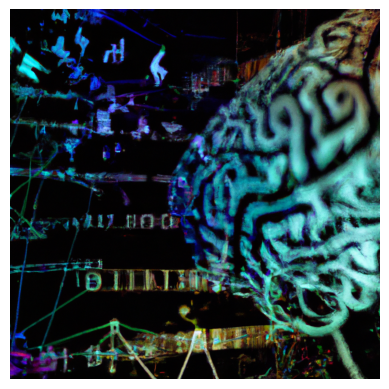

In [50]:
chain_four.invoke({"article":article})